## SHORT VERSION

In [ ]:
import pygid
params = pygid.ExpParams( poni_path = r'LaB6_401mm.poni',
                        # mask_path = r'mask_new.npy',
                        fliplr = True, flipud = True, transp = False, ai = 0.07)

matrix = pygid.CoordMaps(params, vert_positive = True, hor_positive =True)

exp_metadata = pygid.ExpMetadata(
          start_time = r"2021-03-29T15:51:41.343788", 
          source_type = "synchrotron",
          source_name = "ESRF ID10",
          detector = "eiger4m")

data = {
    "name": "241107_C60",
    "structure": {
        "stack": "air | C60 | SiOx | Si",
        "materials": {
            "C60": {
                "name": "Buckminsterfullerene C60",
                "thickness": 25,  #optional
                "cif": "C60.cif",     #optional
                "type": "gradient film" #optional /layer
            },
            "SiOx": {
                "name": "native SiOx",
                "thickness": 1,
            },
            "Si": {
                "name": "Si wafer",
            }
        }
    },
    "preparation": "gradient thin film prepared by thermal evaporation",
    "experimental_conditions": "standard conditions, on air"
}

smpl_metadata = pygid.SampleMetadata(path_to_save="sample.yaml", data=data)




data_path = r"241113_DBTTF_HATCN_grad_0001.h5"

analysis = pygid.Conversion(matrix = matrix, path = data_path, dataset = '/130.1/measurement/eiger4m', frame_num = 7)
# analysis.plot_raw_image()

## GID geometry
analysis.det2q_gid(clims = (50, 1000), plot_result = True, return_result = False, multiprocessing = False, frame_num = None,
                   save_fig = False, path_to_save_fig = "241113_DBTTF_HATCN_gid.png",
                   save_result = False, path_to_save = "file_example.h5", 
                   overwrite_file = True, exp_metadata = exp_metadata, smpl_metadata=smpl_metadata)
# analysis.det2pol_gid(plot_result = True)
# analysis.det2pseudopol_gid(plot_result = True)

# # Transmission geometry
# analysis.det2q(plot_result = True)
# analysis.det2pol(plot_result = True)
# analysis.det2pseudopol_gid(plot_result = True)

## DETAILED VERSION

pol_corr_matrix was applied
solid_angle_corr_matrix was applied


D:\PhD\Programs\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\pygid\conversion.py:374: RuntimeWarning: divide by zero encountered in log
  log_img = np.log(img / clims[1])


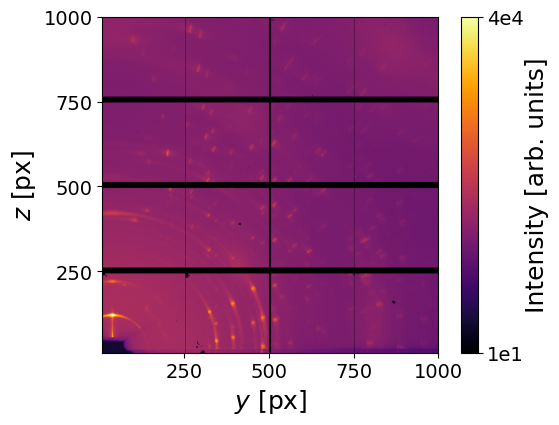

In [12]:
import pygid
params = pygid.ExpParams(
    fliplr = True,                      # Flag for horizontal flipping (left-right)
    flipud = True,                      # Flag for vertical flipping (up-down)
    transp = False,                     # Flag for applying rotation
    SDD = 0.3271661836504515,           # Sample-to-detector distance (in meters)
    wavelength = 0.6199,                # Wavelength (in angstroms)
    rot1 = -0.00263,                    # Detector rotation angle along the horizontal direction (X axis) (in radians)
    rot2 = -0.00465,                    # Detector rotation angle along the vertical direction (Y axis) (in radians)
    centerX = 2000,                       # Beam position in the horizontal direction (in pixels)
    centerY = 2145,                      # Beam position in the vertical direction (in pixels)
    px_size = 75e-6,                    # Detector pixel size (in meters)
    count_range = (10, 10000),          # the intensity range is used to mask hot and dead pixels 
    ai = 0                              # angle of incidence in GID experiments (in degrees) or list of angles     
)

exp_metadata = pygid.ExpMetadata(
          start_time = r"2021-03-29T15:51:41.343788", 
          source_type = "synchrotron",
          source_name = "ESRF ID10",
          detector = "eiger4m")

data = {
    "name": "241107_C60",
    "structure": {
        "stack": "air | C60 | SiOx | Si",
        "materials": {
            "C60": {
                "name": "Buckminsterfullerene C60",
                "thickness": 25,  #optional
                "cif": "C60.cif",     #optional
                "type": "gradient film" #optional /layer
            },
            "SiOx": {
                "name": "native SiOx",
                "thickness": 1,
            },
            "Si": {
                "name": "Si wafer",
            }
        }
    },
    "preparation": "gradient thin film prepared by thermal evaporation",
    "experimental_conditions": "standard conditions, on air"
}

smpl_metadata = pygid.SampleMetadata(path_to_save="sample.yaml", data=data)

matrix = pygid.CoordMaps(params,                                                    # experimental parameters
                        q_xy_range = None, q_z_range = None, dq = 0.003,            # q-range and resolution (in A-1)
                        ang_min = 0, ang_max = 90, dang = 0.1,                      # angle range and resolution (in degrees)
                        hor_positive = False,  vert_positive = False,               # flags for only positive values of q in h
                        make_pol_corr= True,                                        # Flag to calculate polar correction matrix
                        make_solid_angle_corr = True,                               # Flag to calculate solid angle correction matrix
                        make_air_attenuation_corr = False,                          # Flag to calculate air attenuation correction matrix
                        air_attenuation_coeff = 1,                                  # Linear coefficient for air attenuation correction (in 1/m)
                        make_sensor_attenuation_corr = False,                       # Flag to calculate sensor attenuation correction matrix
                        sensor_attenuation_coeff = 1,                               # Linear coefficient for sensor attenuation correction (in 1/m)
                        sensor_thickness = 0.1,                                     # Thickness of the detector sensor (in m)
                        make_absorpton_corr = False,                                # Flag to calculate absorption correction matrix
                        sample_attenuation_coeff = 1,                               # Linear coefficient for sample attenuation correction (in 1/m)
                        sample_thickness = 200e-9,                                  # Thickness of the sample (in m)
                        make_lorentz_corr = False,                                  # Flag to calculate Lorentz correction matrix
                        powder_dim = 3,                                             # Dimension of powder for Lorentz correction: 2 or 3
                        dark_current = None,                                        # Array for dark current values
                        flat_field = None,                                          # Array for flat field correction values
                        path_to_save = None,                                # Path where coordinate map will be saved. Path format should be '.pkl'
                        path_to_load = None                                         # Path from which coordinate map will be loaded. Path format should be '.pkl'
                        )
data_path = r"241113_DBTTF_HATCN_grad_0001.h5"

analysis = pygid.Conversion(matrix = matrix, 
                            path = data_path, 
                            dataset = '/6.1/measurement/eiger4m', 
                            frame_num = None,
                            roi_range = [None, None, None, None],
                            average_all = False,
                            number_to_average = 2,
                           )                   
analysis.plot_raw_image(clims = (50, 1000)                     # colormap limits
                        frame_num = 0,                         # number of frame to plot
                        xlim=(10, 1000), ylim=(10, 1000)       # X and Y image limits
                       )

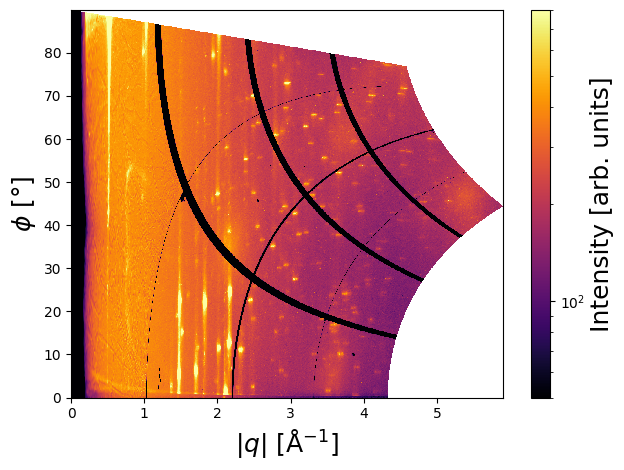

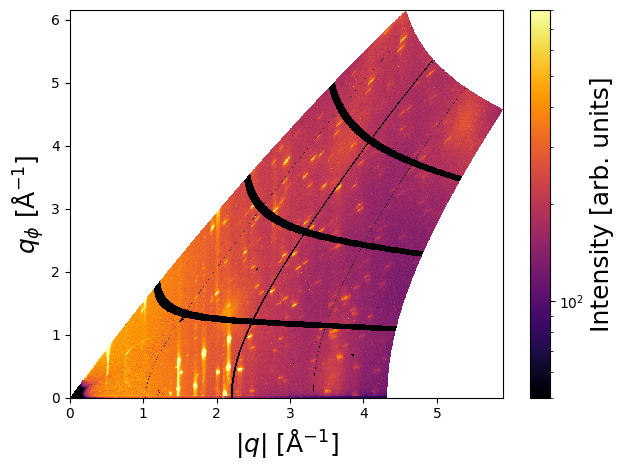

In [4]:
analysis.det2q_gid(clims = (50, 8000),                      # colormap limits 
                   frame_num = [0,1],                      # frame number or list of numbers to convert. If None, will convet all loaded frames   
                   plot_result = False,                      # flag to plot the result
                   return_result = False,                   # flag to return the result
                   save_fig = False,                        # flag to save the results as a picture
                   path_to_save_fig = "graph.tiff",          # path to save the image
                   save_result = False,                      # flag to save the result as a NXsas (.h5) file
                   path_to_save = "result.h5",              # path to save the result with experimental params.
                   h5_group = "entry",                        # dataset name in the h5-file
                   overwrite_file = True,                    # the existing file will be overwritten of true
                   exp_metadata = exp_metadata, 
                   smpl_metadata=smpl_metadata                     # metadata that will be saved with result
                   )
analysis.det2pol_gid(clims = (50, 800), plot_result = True, return_result = False, frame_num = 0,
                      save_result = False)
analysis.det2pseudopol_gid(clims = (50, 800), plot_result = True, return_result = False, frame_num = 0,
                      save_result = False)
                  
                             

In [13]:
analysis.save_nxs(path_to_save  = "result.h5",    # location with the name (.h5) to save, or the key_to_change of the raw image path otherwise it will be saved to the same directory 
            overwrite_file = False) 

Saved in result.h5 in group entry_0000


Saved figure in profile.png


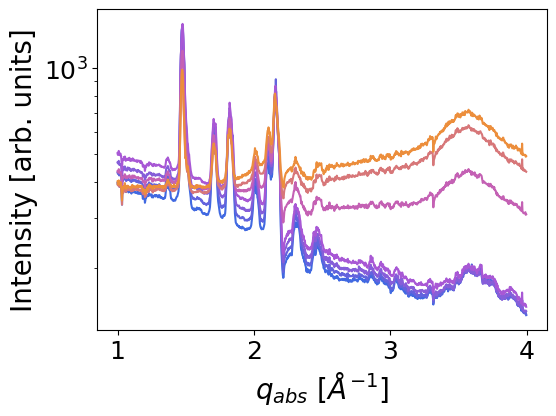

Saved figure in profile.png


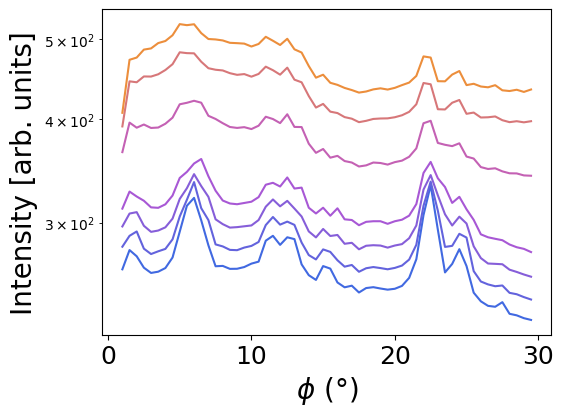

Saved figure in D:\PhD\X-ray data\2024_07_ESRF_ID10_Dima_local/prof.png


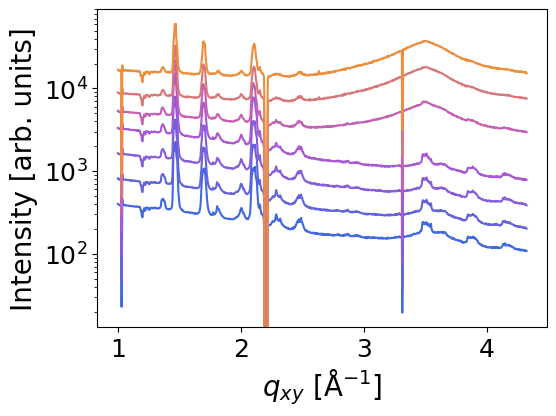




Saved in D:\PhD\X-ray data\\2024_12_ESRF_ID10_Dima\test_converted1.h5 in group entry_0000


In [16]:
q, i = analysis.radial_profile(key = "gid", plot_result = True, shift = 0.1, radial_range = (1,4), save_fig = True,
                                 path_to_save_fig = 'profile.png', angular_range = (0,30), return_result = True)

phi, i = analysis.azim_profile(key = "gid", plot_result = True, shift = 0.1, radial_range = None, save_fig = True,
                                 path_to_save_fig = r'profile.png',
                               angular_range = (1,30), return_result = True)

q_xy, res = analysis.horiz_profile( plot_result = True, shift = 1, q_xy_range = (1, 10), return_result = True, 
                                   save_fig = True, path_to_save_fig = r'prof.png', 
                                   save_result = True, path_to_save = r"test_converted1.h5")

path_to_cif = C:\Users\Ainur Abukaev\Downloads\cif files/DBTTF/DBTTF_mono_696271.cif, orientation = [1, 0, 0], min_int = 0.0005
frame_num = 0 was plotted


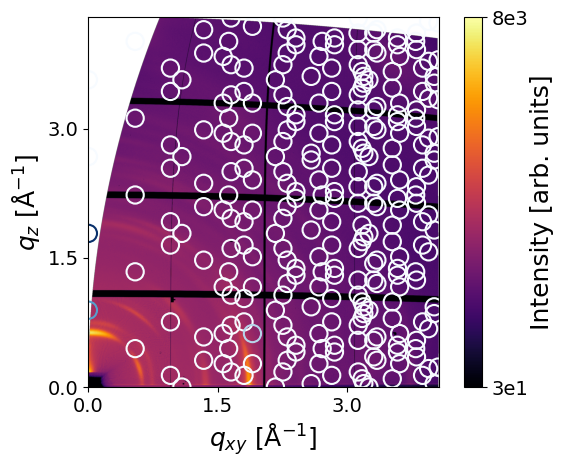

In [3]:
result = analysis.make_simulation(frame_num = 0, clims = (30, 8000),
                         path_to_cif = r"DBTTF_mono_696271.cif",  orientation=[1, 0, 0], min_int = 5e-4,
                         plot_result = True, vmin = 0.5, vmax = 1, linewidth = 1.5, radius = 0.1, plot_mi = False,
                         return_result = True, max_shift = 4)

## Batch analysis

In [ ]:
analysis = Conversion(matrix = matrix1, path = data_path, img_loc_hdf5 = '1.1/measurement/eiger4m',
                      batch_size = 32,                                                                       # maximum size of the batch (32 default)
                     )
analysis.det2q_gid(clims = (50, 1000), plot_result = False, return_result = False, multiprocessing = False, frame_num = None,
                   save_fig = False, path_to_save_fig = "image.png",
                   save_result = True, path_to_save = "file_example.h5", 
                   overwrite_file = True,exp_metadata = exp_metadata, smpl_metadata=smpl_metadata)

## Angular scans

ai list: [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12]
ai list: [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12]


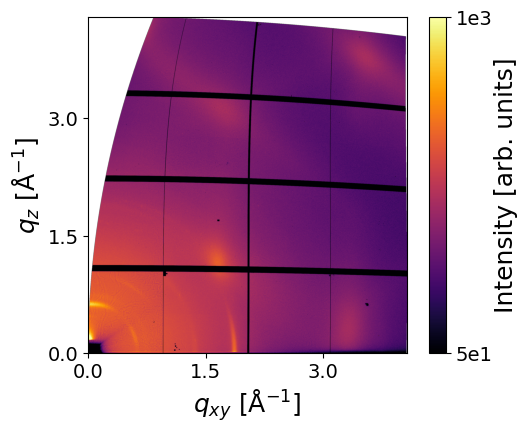

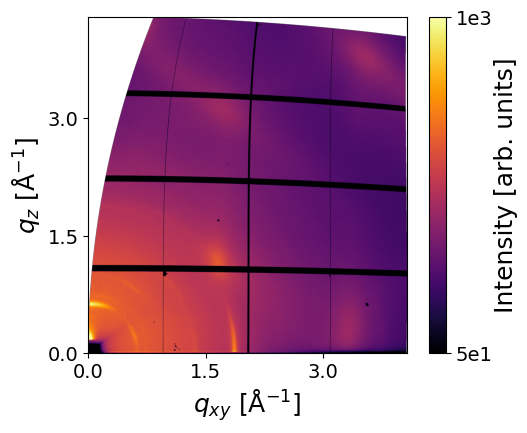

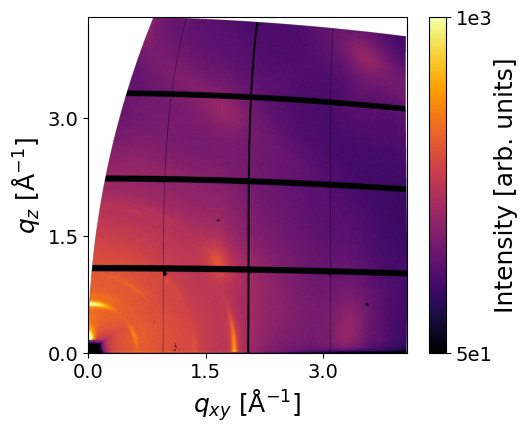

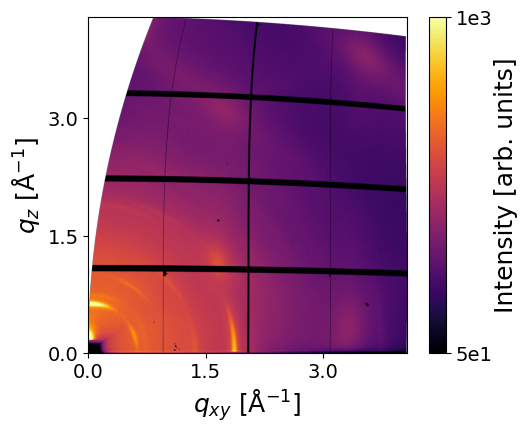

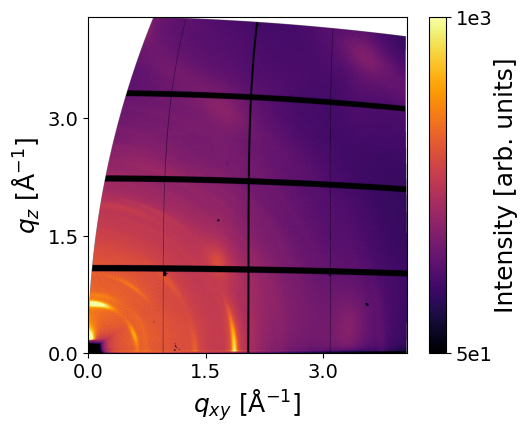

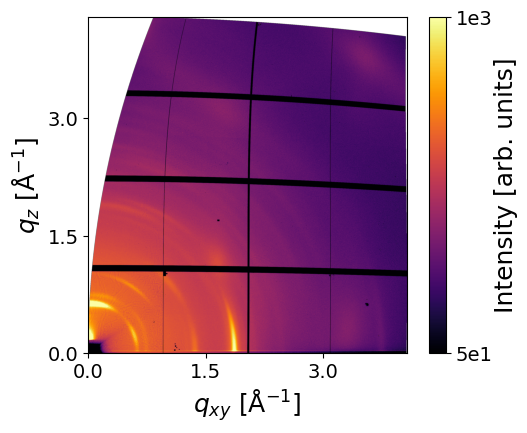

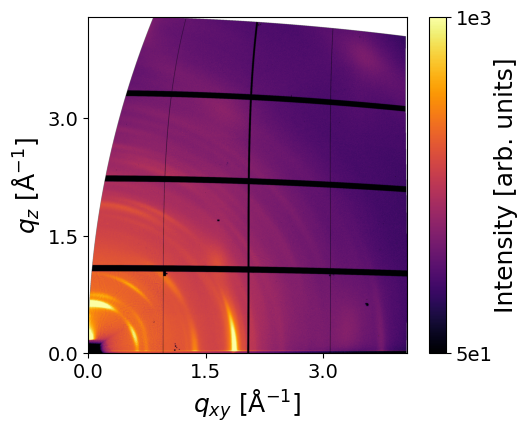

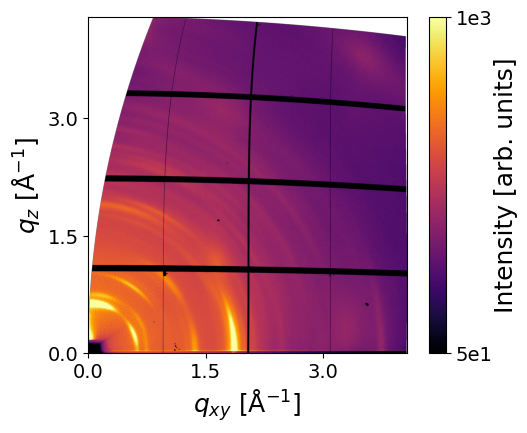

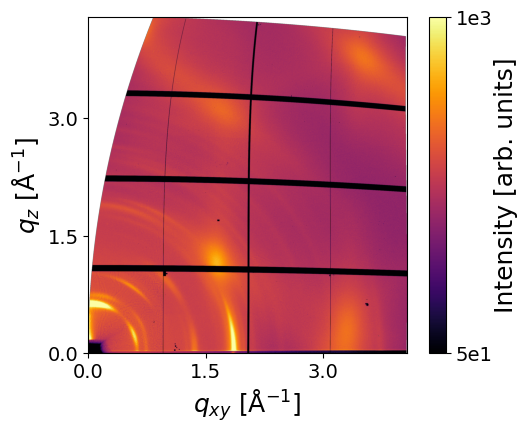

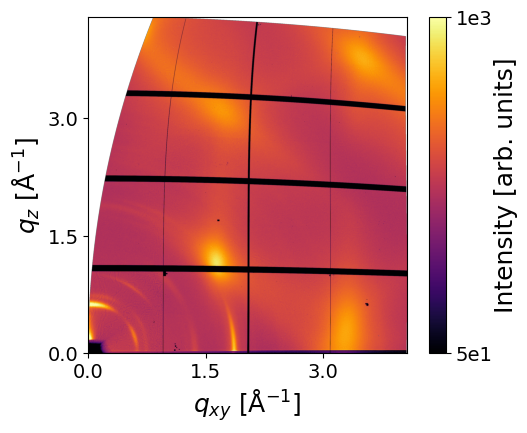

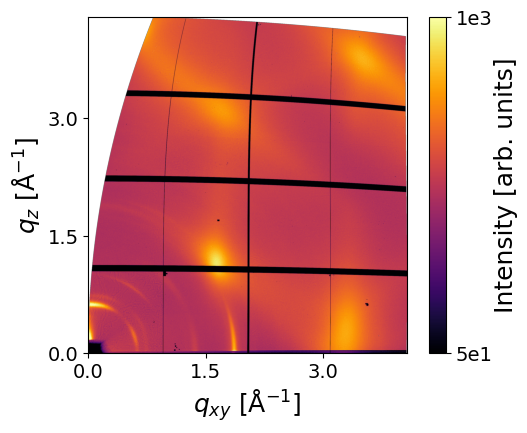

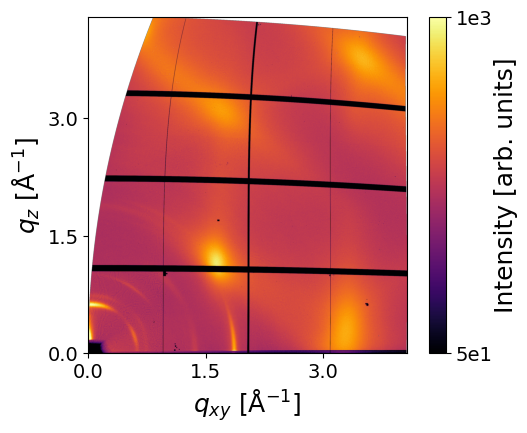

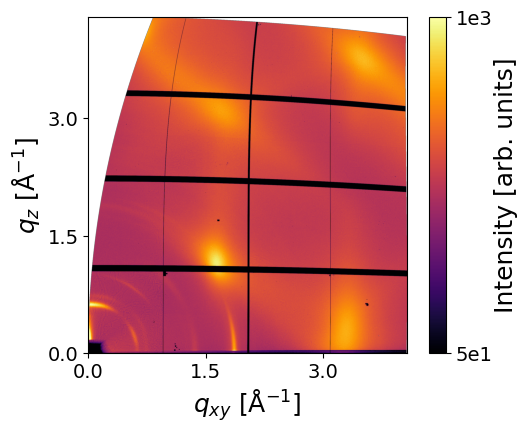

In [8]:
import pygid
params = pygid.ExpParams( poni_path = r'LaB6_401mm.poni',
                        # mask_path = r'mask_new.npy',
                        fliplr = True, flipud = True, transp = False, ai = [0, 0.1, 0.2])

# OR

params = pygid.ExpParams( poni_path = r'LaB6_401mm.poni',
                        # mask_path = r'mask_new.npy',
                        fliplr = True, flipud = True, transp = False, scan = "ascan om 0.04000 0.12000 16 5")

# OR

params = pygid.ExpParams( poni_path = r'LaB6_401mm.poni',
                        # mask_path = r'mask_new.npy',
                        fliplr = True, flipud = True, transp = False, scan = "0.04000 0.12000 16")



matrix = pygid.CoordMaps(params, vert_positive = True, hor_positive =True)

data_path = r"241113_DBTTF_HATCN_grad_0001.h5"

analysis = pygid.Conversion(matrix = matrix, path = data_path, dataset = '/130.1/measurement/eiger4m')
analysis.det2q_gid(clims = (50, 1000), plot_result = True)
